# ***PV Fault Detection***

## Güneş Panellerinde Fotovoltaik Panel Arıza Tespiti

Güneş panelleri araziler üzerinde çok geniş bir alana yayıldığından insan gözü ile tek tek 
incelenip hasar tespiti yapılması verimsiz ve maliyetli bir seçenek olacaktır.

Bu nedenle drone yardımı ile panellerin görüntüleri alınır ve derin öğrenme teknolojisi 
sayesinde panel üzerinde oluşmuş arızaların tespiti gerçekleştirilir.

Bu çalışmada biz de panel arızalarında kullanılabilir bir model oluşturmaya çalıştık.

In [93]:
import numpy as np #numpy büyük boyutlu diziler için destek sağlaması içi kullanıldı
import pandas as pd #DataFrame ve Series gibi veri yapılarını kullanabilmek için 
import matplotlib.pyplot as plt #veride görsel kullanabilmek için ekledik
import os # dizin değiştirme, dosya ismi birleştirme, dosya oluşturma gibi işlemler
from PIL import Image #görüntülerle çalışmak için fonksiyonlar Image modülü içinde bulunuyor

In [94]:
#etiketlerin bulunduğu csv dosyasının yolu verildi
labels_path = 'C:\\Users\\furka\\Desktop\\PV_Fault_SVM\\labels.csv'
labels_df = pd.read_csv(labels_path, header=None, names=['Images', 'Label'])

In [95]:
veri_sayisi = len(labels_df)#toplam veri sayısını görmek için uzunluğu aldık
print("Toplam Veri Sayısı: ", (veri_sayisi))

Toplam Veri Sayısı:  2624


In [96]:
labels_df = pd.read_csv(labels_path)
print(labels_df.head()) #csv dosyasının ilk 5 satırı

   images/cell0001.png  1.0   
0  images/cell0002.png  1.0   
1  images/cell0003.png  1.0   
2  images/cell0004.png  0.0   
3  images/cell0005.png  1.0   
4  images/cell0006.png  1.0   


In [97]:
print(labels_df.columns) # kolon adları, ilk verinin kolon adı gibi göründüğünü gözlemledik

Index(['images/cell0001.png  1.0   '], dtype='object')


In [98]:
#burada kolon isimlerini düzelttik
labels_df.columns = ['Image_Label']#sütun adlarını "Image_label" olarak değiştirdik
labels_df[['Image', 'Label']] = labels_df['Image_Label'].str.split(' ', n=1, expand=True)
#veriyi boşluk karakterine göre böldük ve "Image ve Label" adlı iki sütun oluşturduk
labels_df.drop(columns='Image_Label', inplace=True)#Image_label çıkarıldı 

print(labels_df.head())#başlıklar
print(labels_df.columns)#kolonlar

                 Image    Label
0  images/cell0002.png   1.0   
1  images/cell0003.png   1.0   
2  images/cell0004.png   0.0   
3  images/cell0005.png   1.0   
4  images/cell0006.png   1.0   
Index(['Image', 'Label'], dtype='object')


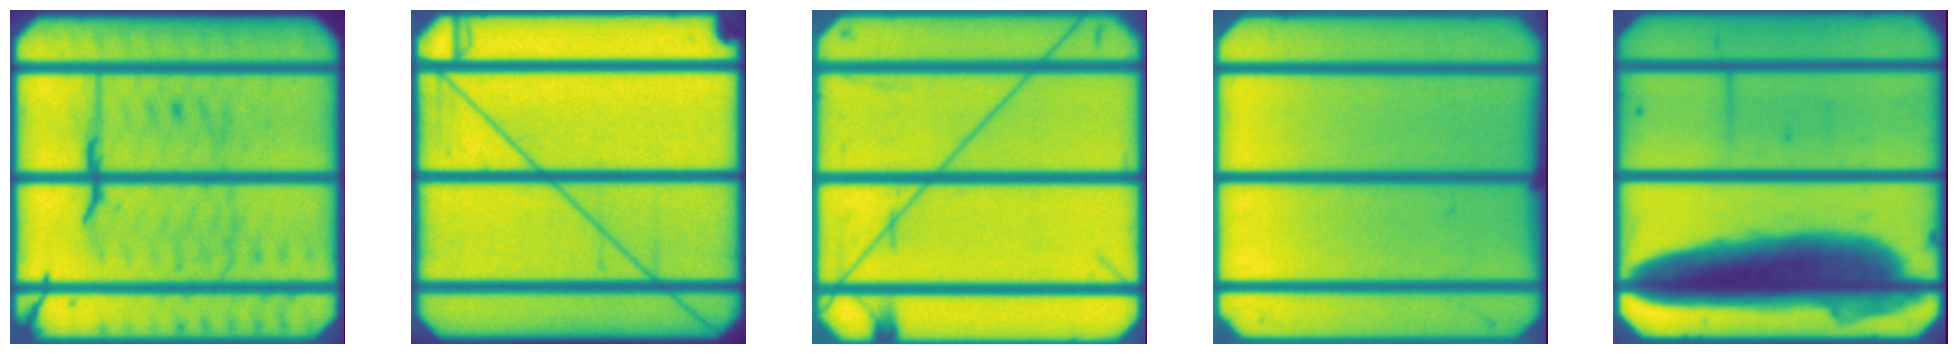

In [99]:
image_visual = 'C:\\Users\\furka\\Desktop\\PV_Fault_SVM\\images'#fotoğrafların yolu
# Dizin içindeki resim dosyalarının listesini aldıl
image_files = [f for f in os.listdir(image_visual) if f.endswith(('.jpg', '.jpeg', '.png'))]

fig, axes = plt.subplots(1, 5, figsize=(25, 10))

# İlk beş resmi görüntüleme
for i, img_file in enumerate(image_files[:5]):
    img_path = os.path.join(image_visual, img_file)
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')

plt.show()

In [100]:
#label ve fotoğrafları atmak için diziler oluşturduk
X = []
Y = labels_df['Label'] 

#  *SVM (Support Vector Machine) algoritması*
Sınıflandırma ve regresyon problemleri için kullanılan güçlü bir makine öğrenimi algoritmasıdır

In [104]:
from sklearn.svm import SVC #'SVC' sınıfı SVM algoritmasını uygulamak için kullanılır
from sklearn.model_selection import train_test_split # eğitim ve test setlerine ayırmak için kullanılır

image_folder_path = 'C:\\Users\\furka\\Desktop\\PV_Fault_SVM' #fotoğraf isimleri yol ile çaıştığı için burada yeniden yol belirttik
width = 300
height = 300

# Fotoğraf dosyalarının yollarını oluşturma
image_paths = [os.path.join(image_folder_path, img_name) for img_name in labels_df['Image']]

# Görüntüleri yükleme, boyutlandırma ve düzleştirme
images = [np.array(Image.open(img_path).resize((width, height))) for img_path in image_paths]
images = [img.flatten() for img in images]#SVM girdi olarak flatten (düzleştirilmiş) veri bekler

# Etiketler
labels = labels_df['Label']

# Veriyi eğitim ve test kümelerine bölmek
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# SVM sınıflandırıcı modelini oluşturma ve eğitme
svm_classifier = SVC(kernel='linear') #doğrusal çekirdek kullandık. sınıflar arasında doğrusal bir ayrım çizmeye çalıştık
svm_classifier.fit(X_train, y_train)



SVC(kernel='linear')

#  Confusion Matrix (Karmaşıklık Matrisi)
sınıflandırma problemlerinde modelin performansını daha ayrınıtılı bir şekilde değerlendirmek için kullanılan bir matristir. Bu matris gerçek ve tahmin edilen değerleri gösterir. 

In [105]:
from sklearn import metrics#sınıflandırma
from sklearn.metrics import mean_absolute_error, mean_squared_error 
#mean_absolute_error gerçek ve tahmin edilen değerler arasındaki mutlak fark ortalaması hesabı
#mean_squared_error gerçek ve tahmin edilen değerler arasındaki farkların karelerini hesaplar
from sklearn.metrics import confusion_matrix, accuracy_score
#confusion_matrix gerçek ve tahmin edilen değerleri karşılaştırarak bir karmaşıklık matrisi oluşturur
# accuracy_score doğru sınıflandırılan örneklerin toplam örnek sayısına göre oranını hesaplar

predictions = svm_classifier.predict(X_test)#eğitilmiş modelin üzerinde tahminler yapar ve predictionsa atar
# Doğruluk skorunu hesaplama
accuracy = accuracy_score(y_test, predictions)#gerçek test değerleri ile SVM tarafından yapılan tahminler arasındaki doğruluk skorunu hesaplar
y_test = np.array(y_test)#Numpy dönüştürme, uygunluk için
conf_matrix = confusion_matrix(y_test, predictions)#gerçek ve tahmin edilen etiketler arasında bir confusion matrisi oluşturur
print("MAE: ", (metrics.mean_absolute_error(predictions, y_test)))#gerçek ve tahmin edilen değerler arasındaki mutlak farkların ortalaması
print("MSE: ", (metrics.mean_squared_error(predictions, y_test)))#bu farkların karelerinin ortalaması
print("Model doğruluğu: ", (accuracy))#model doğruluğu

MAE:  0.23492063492063492
MSE:  0.19597883597883597
Model doğruluğu:  0.6723809523809524


MAE değeri, gerçek ve tahmin edilen değerler arasındaki mutlak farkların ortalamasıdır. 0 ile 1 arasında bir değer alır ve bu durumda 0.23, modelin ortalama olarak gerçek değerlerden 0.23 birim uzakta tahmin yaptığını gösterir.

MSE değeri, gerçek ve tahmin edilen değerler arasındaki farkların karelerinin ortalamasıdır. 0 ile 1 arasında bir değer alır ve bu durumda 0.20, modelin ortalama olarak gerçek değerlerden 0.20 birim kare uzakta tahmin yaptığını gösterir

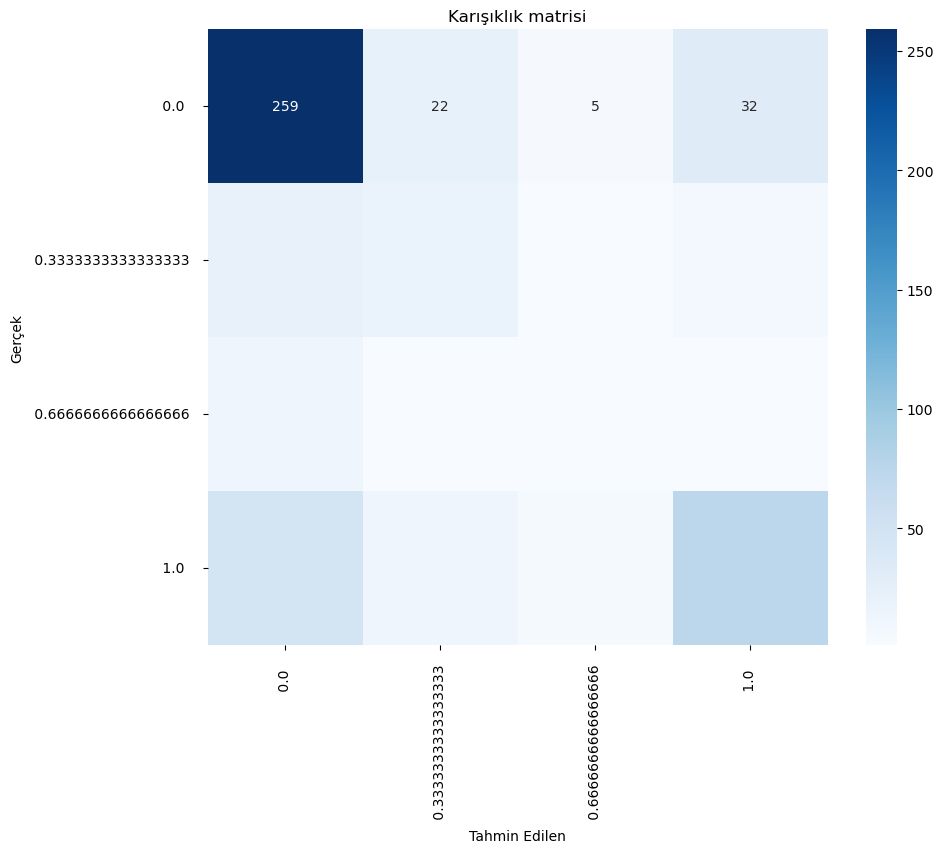

In [106]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.title("Karışıklık matrisi")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

In [116]:
for i, prediction_str in enumerate(predictions[:25]):
    actual_class = y_test[i]


    actual_class = prediction_str.strip()


    if actual_class == "0.0":
        confidence = "Tamamen Çalışır Durumda"
    elif actual_class == "1.0":
        confidence = "Tamamen Arızalı"
    elif actual_class == "0.6666666666666666":
        confidence = "%66 Arızalı"
    elif actual_class == "0.3333333333333333":
        confidence = "%33 Arızalı"


    print(f"Gerçek Durum: {actual_class}, Tahmin: {confidence}")


Gerçek Durum: 1.0, Tahmin: Tamamen Arızalı
Gerçek Durum: 0.0, Tahmin: Tamamen Çalışır Durumda
Gerçek Durum: 1.0, Tahmin: Tamamen Arızalı
Gerçek Durum: 1.0, Tahmin: Tamamen Arızalı
Gerçek Durum: 0.0, Tahmin: Tamamen Çalışır Durumda
Gerçek Durum: 0.0, Tahmin: Tamamen Çalışır Durumda
Gerçek Durum: 0.0, Tahmin: Tamamen Çalışır Durumda
Gerçek Durum: 0.0, Tahmin: Tamamen Çalışır Durumda
Gerçek Durum: 0.0, Tahmin: Tamamen Çalışır Durumda
Gerçek Durum: 0.0, Tahmin: Tamamen Çalışır Durumda
Gerçek Durum: 0.0, Tahmin: Tamamen Çalışır Durumda
Gerçek Durum: 0.0, Tahmin: Tamamen Çalışır Durumda
Gerçek Durum: 0.3333333333333333, Tahmin: %33 Arızalı
Gerçek Durum: 0.3333333333333333, Tahmin: %33 Arızalı
Gerçek Durum: 1.0, Tahmin: Tamamen Arızalı
Gerçek Durum: 1.0, Tahmin: Tamamen Arızalı
Gerçek Durum: 1.0, Tahmin: Tamamen Arızalı
Gerçek Durum: 0.0, Tahmin: Tamamen Çalışır Durumda
Gerçek Durum: 1.0, Tahmin: Tamamen Arızalı
Gerçek Durum: 0.0, Tahmin: Tamamen Çalışır Durumda
Gerçek Durum: 0.0, Tahmin: Tam

In [117]:
from joblib import dump

# Modeli kaydetme
model_filename = 'svm_model.joblib'
dump(svm_classifier, model_filename)


['svm_model.joblib']